In [1]:
 %matplotlib inline

<h1>Lapisco Traning</h1>

https://github.com/lapisco/LapiscoTraining

<h2>Questão 11</h2>
Abrir uma imagem colorida com o fundo branco e um quadrado preto centralizado, transformar em tom de cinza, visualizar imagem de entrada. Criem uma matriz de forma estática com as mesmas dimensões da imagem de entrada (vejam nas propriedades da imagem no Windows), peguem cada um dos pixels da imagem e coloquem na matriz que criaram. Calculem as coordenadas (xc,yc) que representam o centróide deste quadrado. Tentem pintar ou marcar ele na imagem para visualização. Xc será a média todas as coordenadas x que fazem parte do quadrado, e yc é as médias de y do quadrado. As coordenadas do quadrado são identificadas pelo tom preto(valor 0). Façam esta imagem de entrada no Paint.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
#o matplotlib - pode ser usado para substituir o vc2.imshow
#e serve para conseguir ver os gráficos feitos no numpy


In [34]:
# Read a rgb image
image = cv2.imread('img/image_ex11.jpg')

# Transform to grayscale
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Show the input image
cv2.imshow('Input grayscale image', grayscale_image)


In [4]:
# Get the rows and columns of the image
rows, cols = grayscale_image.shape[:2]

# Create a matrix of zeros
new_image = np.zeros((rows, cols), dtype=np.uint8)

# Copy the grayscale image to the new_image
for row in range(rows):
    for col in range(cols):
        new_image[row, col] = grayscale_image[row, col]

In [5]:
# Initialize the centroid coordinates
xc = 0
yc = 0
count = 0

# Loop through the image and find the points of the square
for row in range(rows):
    for col in range(cols):
        if new_image[row, col] == 0:
            xc += row
            yc += col
            count += 1



In [6]:
# Calculates the mean point
xc = int(xc/count)
yc = int(yc/count)

In [7]:
# Draw a circle in the centroid of the square
cv2.circle(new_image, (xc, yc), 5, (255, 255, 255), -1)

# Show the centroid
cv2.imshow('Centroid', new_image)
cv2.waitKey(0)

# Save the results
cv2.imwrite('centroid.jpg', new_image)

True

Questão 12
Abram um arquivo de texto (pode ser o mesmo gerado no tópico 10), criem uma imagem em tom de cinza e visualizem esta imagem.

In [8]:
# Read the .txt file
filename = 'result.txt'
image = []
with open(filename, 'r') as infile:
    # Iterate through lines of the txt file
    for i, line in enumerate(infile):
        # Convert each number of the line to int
        row = [int(number) for number in line.split()]
        # Verify if is the first iteration
        if i == 0:
            # Create the first line of the image
            image = np.hstack(row)
        else:
            # If it is not the first iteration, then add new lines to compose the image
            image = np.vstack(([image, row]))

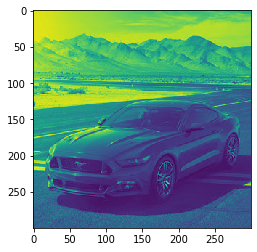

In [9]:
# Convert the image from float64 to uint8
result = np.asarray(image, np.uint8)

# Show the read image
#cv2.imshow('Read image', result)
#cv2.waitKey(0)
imgplot = plt.imshow(result)


<h2>Questão 13</h2>
Abrir uma imagem colorida, transformar em tom de cinza, visualizar imagem de entrada. Criem uma matriz de forma estática com as mesmas dimensões da imagem de entrada (vejam nas propriedades da imagem no Windows). Apliquem uma convolução fazendo uma varredura na matriz utilizando as máscaras do operador gradiente Sobel (procurem no google). Visualizem os resultados e salvem. Obs: busquem compreender os resultados do operador Sobel (parece com o de canny, apenas parece).

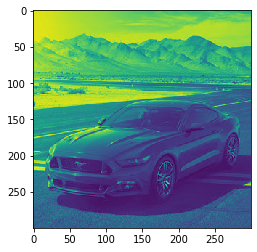

In [12]:
# Read a rgb image
image = cv2.imread('img/image.jpg')

# Transform to grayscale
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Show the input image
#cv2.imshow('Input grayscale image', grayscale_image)#utilizando a OpenCV
img = plt.imshow(grayscale_image) #utilizando o Matplotlib

In [17]:
# Get the rows and columns of the image
rows, cols = grayscale_image.shape[:2]

# Create a matrix with the same dimension of the grayscale image
output_image = np.zeros((rows, cols), np.uint8)

print('x:',rows,'  y:',cols)

x: 300   y: 300


In [18]:
# Apply convolution with the Sobel Kernel
for row in range(1, rows-1):
    for col in range(1, cols-1):
        gx = grayscale_image[row - 1, col - 1] * (-1) + grayscale_image[row, col - 1] * (-2) + \
             grayscale_image[row + 1, col - 1] * (-1) + grayscale_image[row - 1, col + 1] + \
             grayscale_image[row, col + 1] * 2 + grayscale_image[row + 1, col + 1]

        gy = grayscale_image[row - 1, col - 1] * (-1) + grayscale_image[row - 1, col] * (-2) + \
             grayscale_image[row - 1, col + 1] * (-1) + grayscale_image[row + 1, col - 1] + \
             grayscale_image[row + 1, col] * 2 + grayscale_image[row - 1, col + 1]

        output_image[row, col] = (gx**2 + gy**2)**(1/2)


True

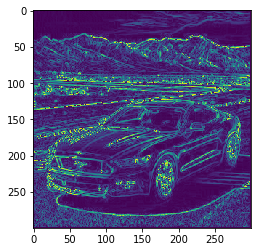

In [22]:
# Show the result image
#cv2.imshow('Sobel image', output_image)
#cv2.waitKey(0)
plt.imshow(output_image)

# Save the result
cv2.imwrite('result/sobel_result.jpg', output_image)

<h2>Questão 16</h2>
Abrir uma imagem colorida, transformar para tom de cinza e aplicar uma Equalização de histograma utilizando a OpenCv, visualizando a imagem de entrada e seu respectivo histograma inicialmente, e, em seguida, o resultado da equalização e seu histograma. Esta técnica aumenta o contraste da imagem.

## mesma imagem das outras questões

### Read a rgb image
image = cv2.imread('image.jpg')
### Transform to grayscale
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


In [11]:
# Equalize image
equalized_image = cv2.equalizeHist(grayscale_image)


In [12]:
# Calculate histograms of the original image and the equalized image using only openCV
original_hist = cv2.calcHist(grayscale_image, channels=[0], mask=None, histSize=[256], ranges=[0, 256])
equalized_hist = cv2.calcHist(equalized_image, channels=[0], mask=None, histSize=[256], ranges=[0, 256])


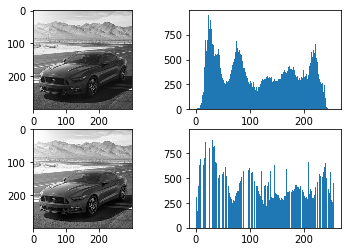

In [14]:
# Show the original, the equalized image and their histograms
# In python we can calculate and show the histogram using only matplotlib

fig = plt.figure(1)
#caso não queira salvar pode usar aplenas o 
#plt.figure()
plt.subplot(221)
plt.imshow(grayscale_image, cmap='gray')
plt.subplot(222)
plt.hist(grayscale_image.ravel(), 256, [0, 256])
plt.subplot(223)
plt.imshow(equalized_image, cmap='gray')
plt.subplot(224)
plt.hist(equalized_image.ravel(), 256, [0, 256])
plt.show()

fig.savefig('result/equalizacao.jpg')

<h2>Questão 17</h2>
Abrir uma imagem colorida, transformar para tom de cinza e aplicar uma Equalização de histograma utilizando apenas o conhecimento de manipulação da imagem, sem a OpenCv, visualizando a imagem de entrada e seu respectivo histograma inicialmente, e, em seguida, o resultado da equalização e seu histograma. Esta técnica aumenta o contraste da imagem.
<b>observação</b>  melhorar o código

Referências
https://gist.github.com/bistaumanga/6309599
https://hackernoon.com/histogram-equalization-in-python-from-scratch-ebb9c8aa3f23

## Read a rgb image
image = cv2.imread('image.jpg')

## Transform to grayscale
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [15]:
# Create one vector to contain the original histogram and other to contain the equalized histogram
original_hist = np.zeros([256], np.uint8)
equalized_hist = np.zeros([256], np.uint8)

# Calculating the initial histogram
# rows, cols = grayscale_image.shape[:2]

img_flat = grayscale_image.flatten()

for pixel in img_flat:
    original_hist[pixel] += 1


In [16]:
# Calculates the cumulative distribution function of the histogram
cdf = [sum(original_hist[:i + 1]) for i in range(len(original_hist))]
cdf = np.array(cdf)

# Normalize the cdf to be between 0-255
normal_cdf = ((cdf - cdf.min())*255)/(cdf.max() - cdf.min())
normal_cdf = normal_cdf.astype('uint8')

In [17]:
equalized_image = normal_cdf[img_flat]

equalized_image = np.reshape(equalized_image, grayscale_image.shape)


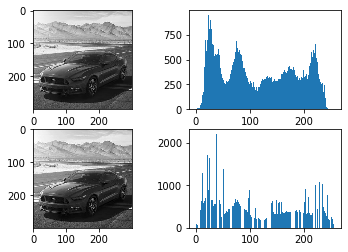

In [18]:
#plt.figure(1)
fig = plt.figure(1)
plt.subplot(221)
plt.imshow(grayscale_image, cmap='gray')
plt.subplot(222)
plt.hist(grayscale_image.ravel(), 256, [0, 256])
plt.subplot(223)
plt.imshow(equalized_image, cmap='gray')
plt.subplot(224)
plt.hist(equalized_image.ravel(), 256, [0, 256])
plt.show()
fig.savefig('equalização sem OpenCV.jpg')

<h2>Questão 18</h2>
Abrir uma imagem colorida, transformar para tom de cinza e aplicar o operador gradiente Laplaciano, aplique a técnica de Equalização no resultado obtido na detecção das bordas, onde a maior intensidade de borda seja 255, e a menor intensidade da borda seja 0.

In [32]:
### Read a rgb image
image = cv2.imread('img/image.jpg')

### Transform to grayscale
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [33]:
# Apply the Laplacian Filter
laplace = cv2.Laplacian(grayscale_image, ddepth=cv2.CV_64F, ksize=3)

# Convert to uint8
laplace = cv2.convertScaleAbs(laplace)

# Equalize the image of the laplacian filter
equalized_laplacian = cv2.equalizeHist(laplace)

### Using OpenCV
#### Show the input image
cv2.imshow('Input grayscale image', grayscale_image)

#### Show the result of the laplacian filter
cv2.imshow('Laplacian filter result', laplace)

#### Show the result of the equalized image of the laplacian filter
cv2.imshow('Equalized Laplacian', equalized_laplacian)

cv2.waitKey(0)

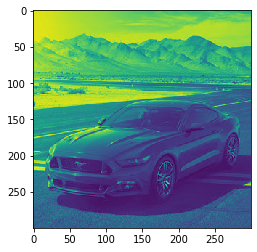

In [34]:
# Show the input image
plt.imshow(grayscale_image)



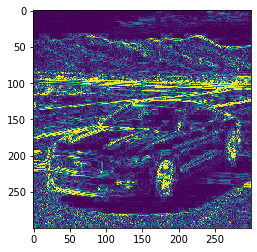

In [38]:
# Show the result of the laplacian filter
plt.imshow(laplace)
plt.imsave('result/laplace.jpg',laplace)



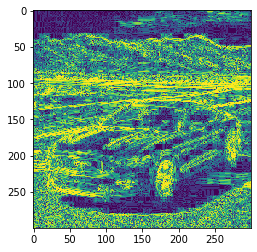

In [37]:
# Show the result of the equalized image of the laplacian filter
plt.imshow(equalized_laplacian)

plt.imsave('result/equalized_laplacian.jpg',equalized_laplacian)


<h2>Questão 19</h2>
Abrir uma imagem colorida, transformar para tom de cinza e aplicar o operador gradiente Sobel, visualizando a imagem de entrada e seu respectivo histograma inicialmente, e, em seguida, o resultado do operador gradiente e seu histograma. Esta técnica realça melhor as bordas da imagem.

In [39]:
# Apply the Sobel Filter
Gx = cv2.Sobel(grayscale_image, dx=1, dy=0, ddepth=cv2.CV_64F, ksize=3)
Gy = cv2.Sobel(grayscale_image, dx=0, dy=1, ddepth=cv2.CV_64F, ksize=3)

sobel = (Gx**2 + Gy**2)**(1/2)

In [40]:
# Convert to uint8
sobel = cv2.convertScaleAbs(sobel)

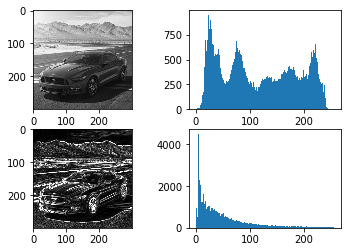

In [41]:
# Show the results
fig = plt.figure(1)
plt.subplot(221)
plt.imshow(grayscale_image, cmap='gray')
plt.subplot(222)
plt.hist(grayscale_image.ravel(), 256, [0, 256])
plt.subplot(223)
plt.imshow(sobel, cmap='gray')
plt.subplot(224)
plt.hist(sobel.ravel(), 256, [0, 256])
plt.show()

fig.savefig('result/sobel.jpg')

<h2>fechar as janelas utilizando open cv</h2>

In [10]:
#para fechar todas as janelas abertas
while(True):
    k = cv2.waitKey(33)
    if k == -1:  # if no key was pressed, -1 is returned
        continue
    else:
        break
cv2.destroyAllWindows()